# Mistral OCR (Usage)

In [1]:
from mistralai import Mistral
import sys
import os
from pathlib import Path
sys.path.insert(1, str(Path.cwd().parent.parent)) 

from src.fs import write_text_file
from src.mistral_ocr import MyMistralOCRpdf

## Single PDF

### Mistral Example

In [2]:
my_mistral_ocr = MyMistralOCRpdf("docs/mistral7b.pdf", image_folder_path = "img/mistral7b")
my_mistral_ocr

MyMistralOCR(file_path='docs/mistral7b.pdf', image_folder_path='img/mistral7b', ocr_status='not processed', ocr_response=None)

OCRResponse(pages=[OCRPageObject(index=0, markdown='# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B
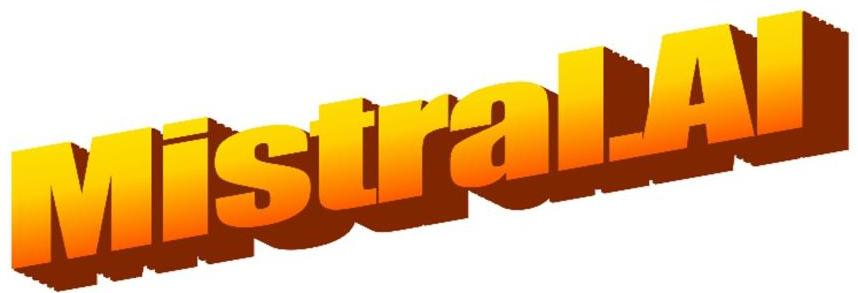
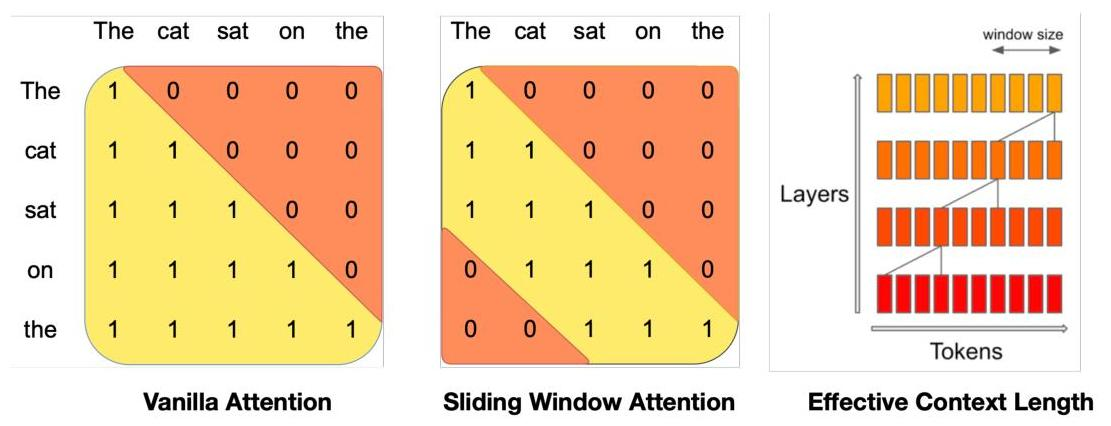
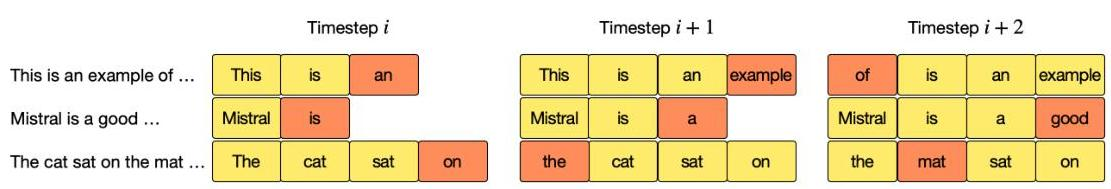
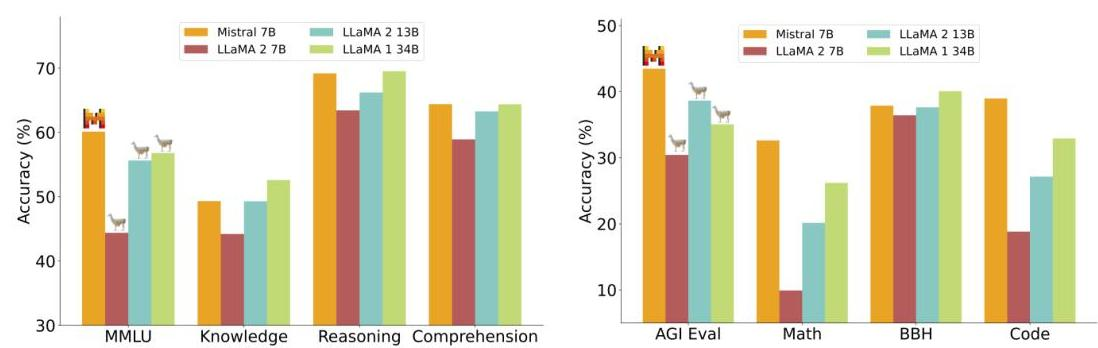
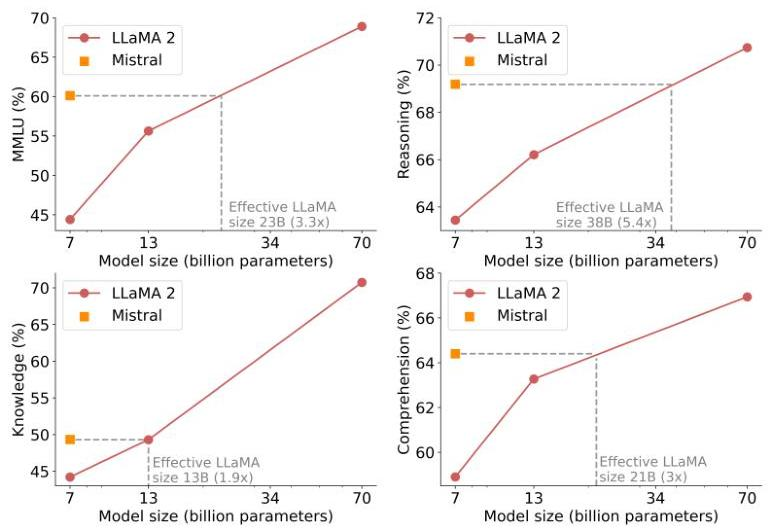
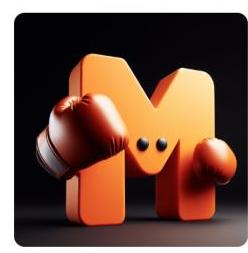

In [3]:
my_mistral_ocr.ocr_pdf()

In [5]:
my_mistral_ocr.to_markdown()

'# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n![img-0.jpeg](img-0.jpeg)\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that surpasses Llama 2 13B - chat mode

In [4]:
my_mistral_ocr.save_images()

'# Mistral 7B \n\nAlbert Q. Jiang, Alexandre Sablayrolles, Arthur Mensch, Chris Bamford, Devendra Singh Chaplot, Diego de las Casas, Florian Bressand, Gianna Lengyel, Guillaume Lample, Lucile Saulnier, Lélio Renard Lavaud, Marie-Anne Lachaux, Pierre Stock, Teven Le Scao, Thibaut Lavril, Thomas Wang, Timothée Lacroix, William El Sayed\n\n\n\n\n#### Abstract\n\nWe introduce Mistral 7B, a 7-billion-parameter language model engineered for superior performance and efficiency. Mistral 7B outperforms the best open 13B model (Llama 2) across all evaluated benchmarks, and the best released 34B model (Llama 1) in reasoning, mathematics, and code generation. Our model leverages grouped-query attention (GQA) for faster inference, coupled with sliding window attention (SWA) to effectively handle sequences of arbitrary length with a reduced inference cost. We also provide a model fine-tuned to follow instructions, Mistral 7B - Instruct, that surpasses Llama 2 13B - chat model both on human and autom
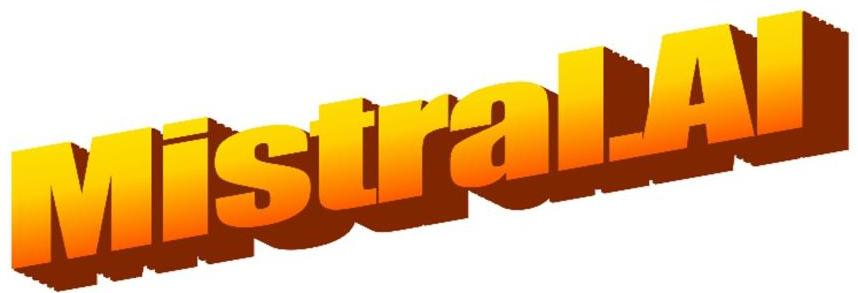
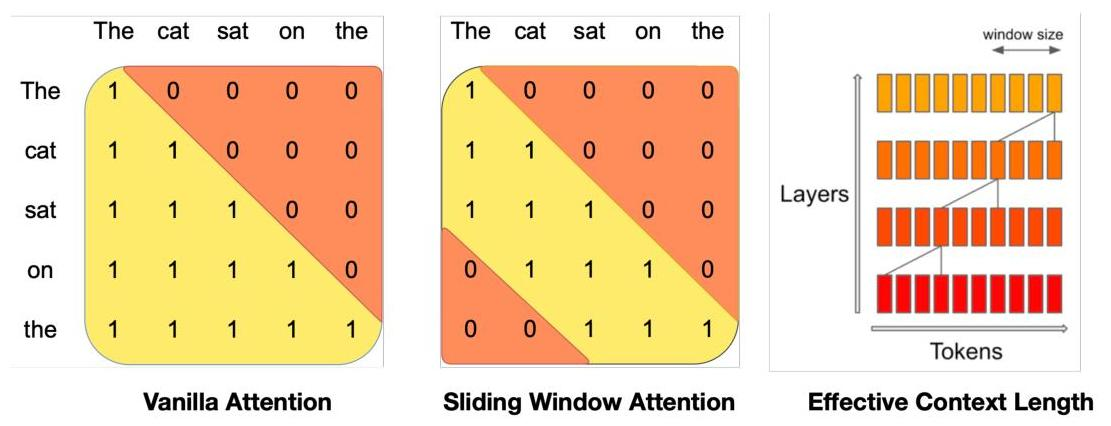
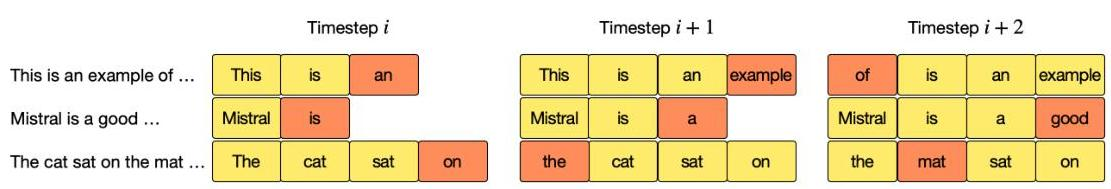
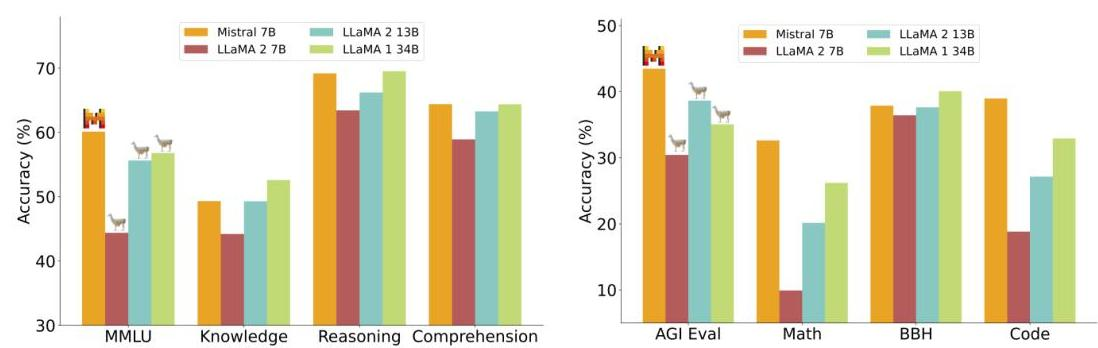
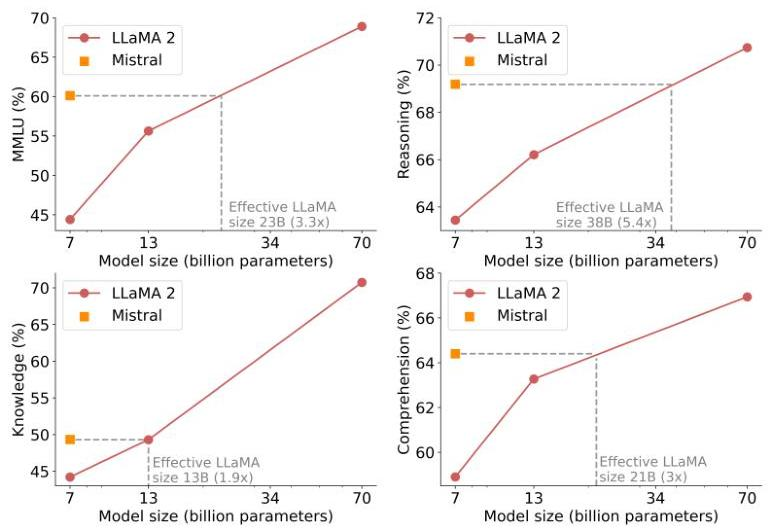
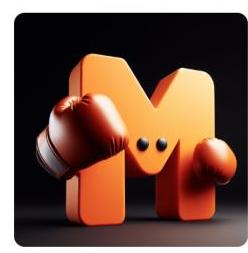

In [7]:
my_mistral_ocr.to_markdown_with_inline_img()

In [8]:
write_text_file(my_mistral_ocr.to_markdown(), "out/mistral7b-text-only.md")

Text successfully written to out/mistral7b-text-only.md.


### PDF with Table

In [8]:
rlq_pain = MyMistralOCRpdf("docs/Right Lower Quadrant Pain.pdf")
rlq_pain.ocr_pdf()

OCRResponse(pages=[OCRPageObject(index=0, markdown='# American College of Radiology ACR Appropriateness Criteria ${ }^{\\circledR}$ Right Lower Quadrant Pain \n\nVariant 1:\nRight lower quadrant pain. Initial imaging.\n\n| Procedure | Appropriateness Category | Relative Radiation Level |\n| :-- | :--: | :--: |\n| CT abdomen and pelvis with IV contrast | Usually Appropriate | $\\mathbf{0 \\% \\%}$ |\n| US abdomen | May Be Appropriate | O |\n| US pelvis | May Be Appropriate | O |\n| MRI abdomen and pelvis without and with IV <br> contrast | May Be Appropriate | O |\n| MRI abdomen and pelvis without IV contrast | May Be Appropriate | O |\n| CT abdomen and pelvis without IV contrast | May Be Appropriate | $\\mathbf{0 \\% \\%}$ |\n| Radiography abdomen | Usually Not Appropriate | $\\mathbf{0 \\%}$ |\n| Fluoroscopy contrast enema | Usually Not Appropriate | $\\mathbf{0 \\% \\%}$ |\n| CT abdomen and pelvis without and with IV <br> contrast | Usually Not Appropriate | $\\mathbf{0 \\% \\% \\%}$

In [9]:
write_text_file(rlq_pain.to_markdown(), "out/RLQ_pain.md")

Text successfully written to out/RLQ_pain.md.


## Multiple PDF 

In [2]:
from src.mistral_ocr import MyMistralOCRpdfMulti

In [3]:
mistral_ocr_multi = MyMistralOCRpdfMulti(dir_input = "docs/input", 
                                         dir_output="out/", 
                                         dir_image = "img/",
                                         inline_image=False)

In [4]:
mistral_ocr_multi.execute()

{'processed': ['docs/input/A fully automated MRI-based deep-learning algorithm for classifying germinomas and nongerminomatous germ cell tumors..pdf',
  'docs/input/A comprehensive machine-learning model applied to MRI to classify germinomas of the pineal region.pdf'],
 'failed': {},
 'total': 2}

In [4]:
mistral_ocr_multi_w_img = MyMistralOCRpdfMulti(dir_input = "docs/input", dir_output="out/", inline_image=True, filename_suffix="_with_img")
mistral_ocr_multi_w_img

MyMistralOCRpdfMulti(dir_input='docs/input', dir_output='out', inline_image=True, filename_suffix='_with_img', filename_prefix='')

In [5]:
mistral_ocr_multi_w_img.execute()

{'processed': ['docs/input/A fully automated MRI-based deep-learning algorithm for classifying germinomas and nongerminomatous germ cell tumors..pdf',
  'docs/input/A comprehensive machine-learning model applied to MRI to classify germinomas of the pineal region.pdf'],
 'failed': {},
 'total': 2}